<!-- ---
title: Exploratory Data Analysis
author: Andy Wang
date: Thu May 23 2024
--- -->

# Exploratory Data Analysis

Andy Wang

In [1]:
import json
import codecs

In [2]:
def load_data(path: str) -> dict:
    with codecs.open(path, 'r', encoding='utf-8') as f:
        return json.load(f)

## Authors File

`train_author.json`

In [3]:
authors_path: str = 'IND-WhoIsWho/train_author.json'

authors: dict = load_data(authors_path)

### Data structure

#### Overall structure

```Python
dict[
    "id": dict[                     # ID (unique) of author
        "name": str,                # name (nonunique) of author
        "normal_data": list[str],   # list of correct paper IDs
        "outliers": list[str]       # list of incorrectly assigned paper IDs
    ]
]
```

#### Example entry

```Python
{
    ...
    "45gaRs0B": {
            "name": "yang li",
            "normal_data": [
                "Hts2FXLD",
                ...
                "hj7IUi8b"
            ],
            "outliers": [
                "j0LSaMj6",
                ...
                "oFylyNXI"
            ]
    },
    ...
}
```

In [4]:
id_set = set()
name_set = set()
paper_set = set()

for author_id, data in authors.items():
    id_set.add(author_id)
    name_set.add(data.get('name'))
    for valid_paper in data.get('normal_data'):
        paper_set.add(valid_paper)
    for outlier_paper in data.get('outliers'):
        paper_set.add(outlier_paper)

print(
    f'Number of unique IDs: {len(id_set)}',
    f'Number of unique Names: {len(name_set)}',
    f'Number of unique Papers: {len(paper_set)}',
    sep='\n'
)

Number of unique IDs: 779
Number of unique Names: 756
Number of unique Papers: 145023


From the counts we see that 779 - 756 = 23 names are not unique.

## Papers File

`pid_to_info_all.json`

In [5]:
papers_path: str = 'IND-WhoIsWho/pid_to_info_all.json'

papers: dict = load_data(papers_path)

### Data Structure

#### Overall Structure

```Python
dict[
    "id": dict[                         # ID (unique) of paper
        "id": str,                      # same ID as above
        "title": str,                   # title of paper
        "authors": list[dict[           # list of dicts containing 
            "name": str, "org": str]],  # author name (nonunique) and org
        "abstract": str,                # paper abstract (long str)
        "keywords": list[str],          # list of paper keywords
        "venue": str,                   # name of publishing venue
        "year": int                     # year of publication (int)
    ]
]
```

#### Example Entry

```Python
"6IsfnuWU": {
        "id": "6IsfnuWU",
        "title": "Probabilistic Skyline Operator over Sliding Windows",
        "authors": [
            {"name": "Wenjie Zhang", "org": "UNSW Sydney"},
            ...
            {"name": "Jeffrey Xu Yu", "org": "Chinese University of Hong Kong"}
        ],
        "abstract": "Skyline computation ... in real time.",
        "keywords": [
            "continuous skyline query",
            ...
            "Sliding Windows"
        ],
        "venue": "ICDE '09 Proceedings ... on Data Engineering",
        "year": 2009
},
```

In [7]:
id_set = set()
inner_id_set = set()
title_set = set()
author_name_set = set()
author_org_set = set()

for paper_id, data in papers.items():
    id_set.add(paper_id)
    inner_id_set.add(data.get('id'))
    title_set.add(data.get('title'))
    for author in data.get('authors'):
        author_name_set.add(author.get('name'))
        author_org_set.add(author.get('org'))

print(
    f'Number of unique IDs: {len(id_set)}',
    f'Number of unique Inner IDs: {len(inner_id_set)}',
    f'Number of unique Titles: {len(title_set)}',
    f'Number of unique Author Names: {len(author_name_set)}',
    f'Number of unique Organizations: {len(author_org_set)}',
    sep='\n'
)

Number of unique IDs: 317302
Number of unique Inner IDs: 317302
Number of unique Titles: 300855
Number of unique Author Names: 732944
Number of unique Organizations: 319572


In [8]:
shared_name_set = name_set & author_name_set

print(
    f'Number of unique author names in author file: {len(name_set)}',
    f'Number of unique author names in paper file: {len(author_name_set)}',
    f'Number of unique author names in both files: {
        len(shared_name_set)
    }',
    sep='\n'
)

Number of unique author names in author file: 756
Number of unique author names in paper file: 732944
Number of unique author names in both files: 612


## TA-Processed pkl File

`dataset/train.pkl`

In [9]:
import pickle

In [10]:
pickle_path = 'dataset/train.pkl'

with open(pickle_path, 'rb') as f:
    data = pickle.load(f)

In [40]:
print(f'Type of graph data: {type(data)}')
print(f'Number of entries in graph data: {len(data)}')

lengths_set = set()
for entry in data:
    lengths_set.add(len(entry))

print(f'Number of elements in each entry: {lengths_set}')

element_1_type_set = set()
element_2_type_set = set()
element_3_type_set = set()
element_4_type_set = set()
for entry in data:
    e1, e2, e3, e4 = entry
    element_1_type_set.add(type(e1))
    element_2_type_set.add(type(e2))
    element_3_type_set.add(type(e3))
    element_4_type_set.add(type(e4))

print(f'Type of element 1 in each entry: {element_1_type_set}')
print(f'Type of element 2 in each entry: {element_2_type_set}')
print(f'Type of element 3 in each entry: {element_3_type_set}')
print(f'Type of element 4 in each entry: {element_4_type_set}')

Type of graph data: <class 'list'>
Number of entries in graph data: 779
Number of elements in each entry: {4}
Type of element 1 in each entry: {<class 'torch_geometric.data.batch.DataBatch'>}
Type of element 2 in each entry: {<class 'torch.Tensor'>}
Type of element 3 in each entry: {<class 'str'>}
Type of element 4 in each entry: {<class 'list'>}


In [31]:
import networkx as nx
import matplotlib.pyplot as plt

from torch_geometric.utils import to_networkx

def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

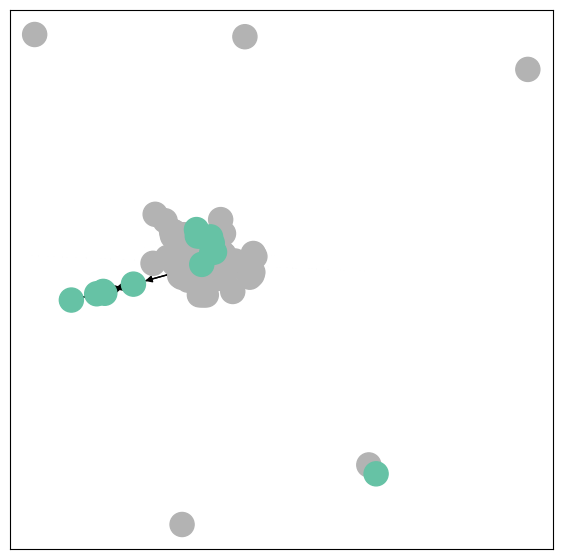

In [33]:
G = to_networkx(data[0][0])
visualize_graph(G, color=data[0][0].y)